In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [3]:
azure_df = pd.read_csv('/content/azure_usage (1).csv')
external_df = pd.read_csv('/content/external_factors.csv.csv')

In [7]:
print("Azure Usage Data:")
display(azure_df.head(10))

Azure Usage Data:


,date,region,resource_type,usage_cpu,usage_storage,users_active
0,2023-01-01,East US,VM,88,1959,470
1,2023-01-01,East US,Storage,92,1595,388
2,2023-01-01,East US,Container,70,621,414
3,2023-01-01,West US,VM,60,1982,287
4,2023-01-01,West US,Storage,85,1371,351
5,2023-01-01,West US,Container,52,1832,457
6,2023-01-01,North Europe,VM,73,1937,493
7,2023-01-01,North Europe,Storage,51,1715,476
8,2023-01-01,North Europe,Container,82,959,221
9,2023-01-01,Southeast Asia,VM,93,1356,248


In [6]:
print("External Factors Data:")
display(external_df.head(10))

External Factors Data:


,date,economic_index,cloud_market_demand,holiday
0,2023-01-01,104.97,0.99,1
1,2023-01-02,106.48,1.15,0
2,2023-01-03,97.66,0.98,0
3,2023-01-04,115.79,1.08,0
4,2023-01-05,95.31,1.05,0
5,2023-01-06,95.37,0.95,0
6,2023-01-07,102.42,0.81,1
7,2023-01-08,82.75,0.94,1
8,2023-01-09,89.87,1.03,0
9,2023-01-10,90.92,0.86,0


In [8]:
print("Azure Data Info:")
azure_df.info()

Azure Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           1080 non-null   object
 1   region         1080 non-null   object
 2   resource_type  1080 non-null   object
 3   usage_cpu      1080 non-null   int64 
 4   usage_storage  1080 non-null   int64 
 5   users_active   1080 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 50.8+ KB


In [9]:
print("External Data Info:")
external_df.info()

External Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 90 non-null     object 
 1   economic_index       90 non-null     float64
 2   cloud_market_demand  90 non-null     float64
 3   holiday              90 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 2.9+ KB


## Handling Missing Values

In [10]:
print("Missing Values - Azure Data")
print(azure_df.isnull().sum())

Missing Values - Azure Data
date             0
region           0
resource_type    0
usage_cpu        0
usage_storage    0
users_active     0
dtype: int64


In [11]:
print("Missing Values - External Data")
print(external_df.isnull().sum())

Missing Values - External Data
date                   0
economic_index         0
cloud_market_demand    0
holiday                0
dtype: int64


In [12]:
print("Azure Data Description")
display(azure_df.describe())

Azure Data Description


,usage_cpu,usage_storage,users_active
count,1080.000000,1080.000000,1080.000000
mean,74.651852,1242.477778,352.694444
std,14.549621,432.444284,86.280150
min,50.000000,500.000000,200.000000
25%,62.000000,881.750000,283.000000
50%,75.000000,1262.000000,353.000000
75%,87.000000,1609.000000,427.000000
max,99.000000,1995.000000,499.000000


In [13]:
print("External Data Description")
display(external_df.describe())

External Data Description


,economic_index,cloud_market_demand,holiday
count,90.000000,90.000000,90.000000
mean,98.930444,1.006667,0.277778
std,8.825072,0.101517,0.450412
min,73.800000,0.800000,0.000000
25%,93.035000,0.940000,0.000000
50%,99.645000,1.015000,0.000000
75%,103.567500,1.077500,1.000000
max,118.860000,1.270000,1.000000


## Data Visualization

In [14]:
azure_df['date'] = pd.to_datetime(azure_df['date'])

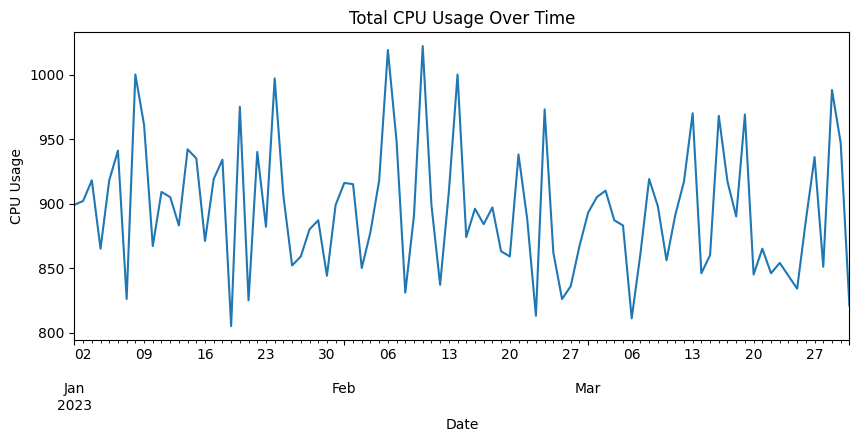

In [15]:
# CPU usage over time
plt.figure(figsize=(10, 4))
azure_df.groupby('date')['usage_cpu'].sum().plot()
plt.title("Total CPU Usage Over Time")
plt.xlabel("Date")
plt.ylabel("CPU Usage")
plt.show()

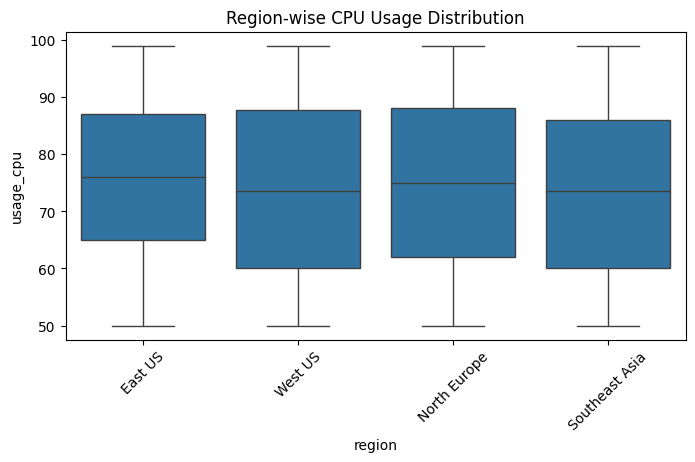

In [16]:
# Region-wise CPU usage
plt.figure(figsize=(8, 4))
sns.boxplot(x='region', y='usage_cpu', data=azure_df)
plt.title("Region-wise CPU Usage Distribution")
plt.xticks(rotation=45)
plt.show()

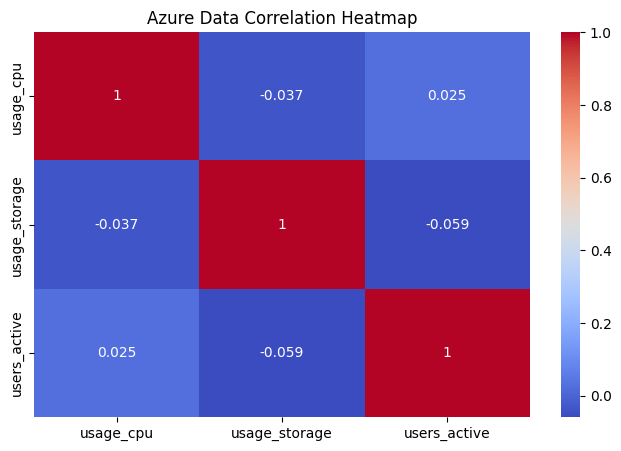

In [17]:
# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(azure_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Azure Data Correlation Heatmap")
plt.show()